# Injuries vizualization in the car

In [1]:
import sys
sys.path.append('../../src')
from data_loading import *
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

```python
data_2018 = YearLoader(2018)
data_2018.get_dataframe("characteristics")
data_2018.get_dataframe("locations")
data_2018.get_dataframe("passengers")
data_2018.get_dataframe("vehicles")
```

In [2]:
data = YearLoader(2018)

/home/gautier/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
passengers = data.get_dataframe("passengers")
passengers

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
130164,201800057781,NaN,3,4,1,9.0,3.0,4.0,3.0,1.0,1975.0,A01
130165,201800057782,1.0,1,4,2,9.0,11.0,NaN,NaN,NaN,1993.0,A01
130166,201800057782,1.0,1,4,1,9.0,21.0,NaN,NaN,NaN,1974.0,B01
130167,201800057783,1.0,1,4,1,9.0,11.0,NaN,NaN,NaN,1973.0,B01


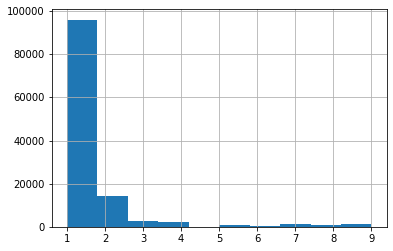

In [4]:
passengers['place'].hist()

# Number of death given the seat number (1 is driver, 2 front, 9 and 7 are back left and right...)

In [5]:
def get_car_injuries_df(data, dead_only=False):
    """Create a DataFrame (place, count) .


    Parameters
    ----------
    data : YearLoader
        Dataset loading class.
        
    dead_only : bool
        only generate DataFrame for death

    Returns
    -------
    pandas.DataFrame
        Injuries count for each sit.

    """
    passengers = data.get_dataframe("passengers")
    
    if dead_only:
        return pd.DataFrame(passengers[passengers['grav']==2]['place'].dropna().value_counts())
    else:
        return pd.DataFrame(passengers['place'].dropna().value_counts())

In [6]:
place_count = get_car_injuries_df(data, dead_only=False)
place_count

,place
1.0,96011
2.0,14465
3.0,2475
4.0,2049
9.0,1435
7.0,1297
8.0,688
5.0,610
6.0,179


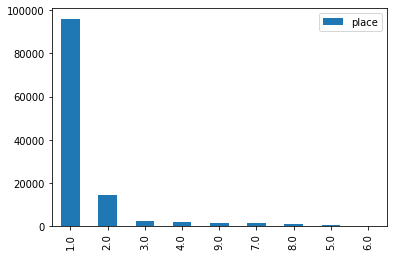

In [7]:
place_count.plot(kind='bar')

In [8]:
place_count_dead = get_car_injuries_df(data, dead_only=True)
place_count_dead

,place
1.0,2411
2.0,318
9.0,37
7.0,34
4.0,33
3.0,29
8.0,14
5.0,7
6.0,1


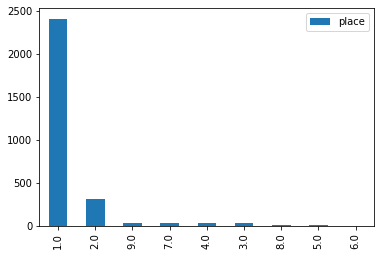

In [9]:
place_count_dead.plot(kind='bar')